In [69]:
# Initial Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Importing data
# df_hopkins = pd.read_csv('./Data/1_county_level_confirmed_cases.csv')
df_corona1 = pd.read_csv('./Data/covid_19_data.csv')
df_corona2 = pd.read_csv('./Data/COVID19_open_line_list.csv')
df_tweet_1 = pd.read_csv('./Data/tweets/2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')

In [28]:
print(df_corona1.shape)
print(df_corona2.shape)
print(df_tweet_1.shape)

(12569, 8)
(14126, 45)
(526791, 22)


In [46]:
# Import of folium packages
import folium
from folium import plugins
from folium.plugins import HeatMap

#making map of SF
Map = folium.Map([37.773972, -122.431297], zoom_start=13)
Map

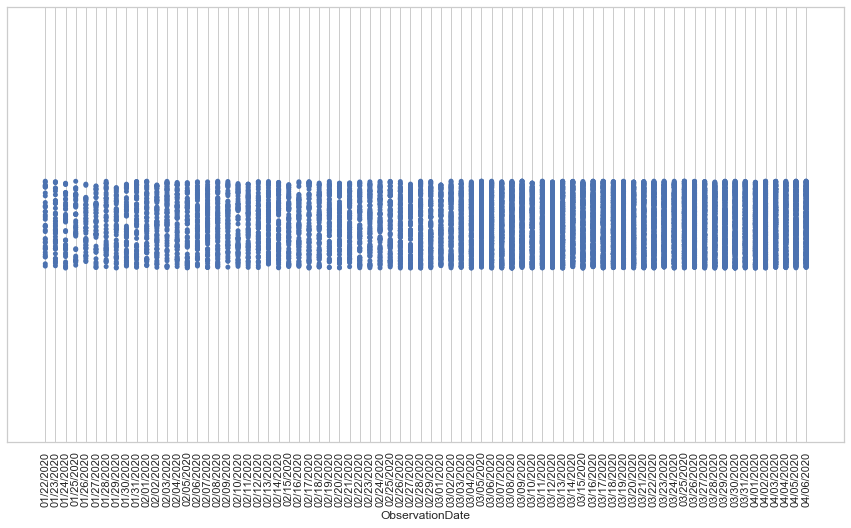

In [90]:
#importing Seaborn
import seaborn as sns
plt.figure(figsize=(15,8))
#plotting jitter plot
sns.set(style="whitegrid")
chart = sns.stripplot(x=df_corona1["ObservationDate"])
plt.xticks(rotation=90)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

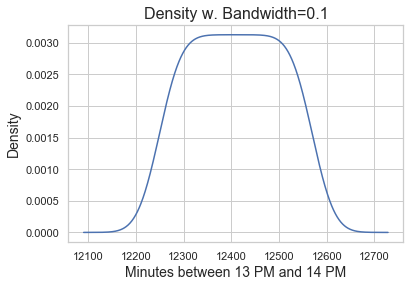

In [97]:
#Plot 1
plt.title("Density w. Bandwidth=0.1",fontsize=16)
plt.xlabel('Minutes between 13 PM and 14 PM',fontsize=14)
plt.ylabel('Density',fontsize=14)
data2['SNo'].plot.density(bw_method=0.4)


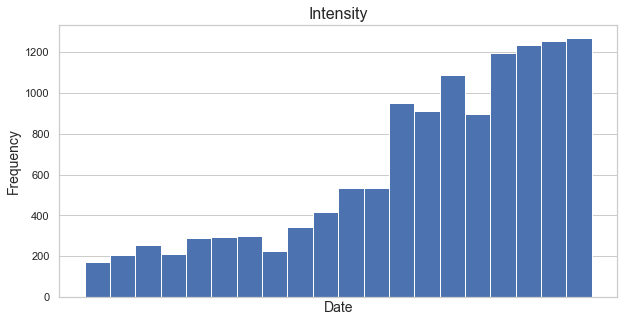

In [110]:
# Making histogram plot 1
plt.title("Intensity",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
df_corona1['ObservationDate'].hist(bins=20, figsize=(10,5))
plt.xticks([])
plt.show()

In [100]:
df_corona1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12564,12565,04/06/2020,Wyoming,US,2020-04-06 23:28:35,210.0,0.0,0.0
12565,12566,04/06/2020,Xinjiang,Mainland China,2020-04-06 23:28:35,76.0,3.0,73.0
12566,12567,04/06/2020,Yukon,Canada,2020-04-06 23:28:35,6.0,0.0,0.0
12567,12568,04/06/2020,Yunnan,Mainland China,2020-04-06 23:28:35,184.0,2.0,172.0


In [115]:
df_tweet_1.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1235160526780416001,1163436067904618496,2020-03-04T11:09:52Z,Nanank08000089,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,21,142,NaN,2019-08-19T13:02:45Z,False,und
1,1235160526780416001,1163436067904618496,2020-03-04T11:09:52Z,Nanank08000089,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,21,142,NaN,2019-08-19T13:02:45Z,False,und
2,1235160546451873797,2255210942,2020-03-04T11:09:57Z,David_Mulroney,China’s wildlife trade via @SCMPgraphics http...,Twitter for iPad,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,5666,2796,NaN,2013-12-20T16:14:18Z,False,en
3,1235160597475602432,366491737,2020-03-04T11:10:09Z,MarykeSchoonen,Proof that the media such as @CNN is unnecessa...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,41,94,NaN,2011-09-02T08:22:14Z,False,en
4,1235160647614291968,61557732,2020-03-04T11:10:21Z,Arjit_Garg,Indians are a shitty breed of humans. With the...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Greater Noida, India",city,486,50,NaN,2009-07-30T18:18:25Z,False,en


In [116]:
# Importing time package
import time
# Defining empty datatime list
Datetime = []
# Looping over all date values in weather dataframe and appending correct matching datetime format to datetime list.
for i in df_tweet_1["created_at"].values:
    strp  = time.strptime(i[:19], "%Y-%m-%dT%H:%M:%S")
    strf = time.strftime("%Y-%m-%d %H:%M:%S", strp)
    Datetime.append(strf)
# Renaming datetime column to match column name for rounded datatime data in crime dataframe
df_tweet_1['Datetime_rounded'] = pd.to_datetime(Datetime)

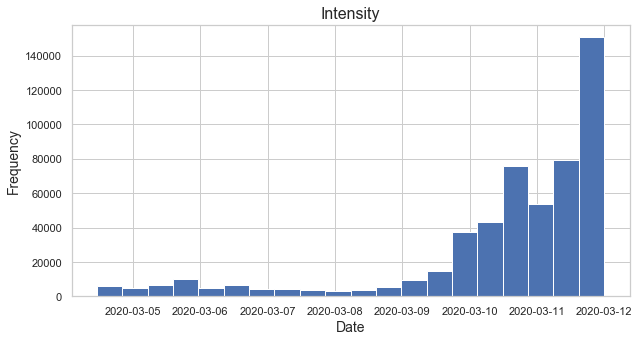

In [119]:
# Making histogram plot 1
plt.title("Intensity",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
df_tweet_1['Datetime_rounded'].hist(bins=20, figsize=(10,5))
#plt.xticks([])
plt.show()

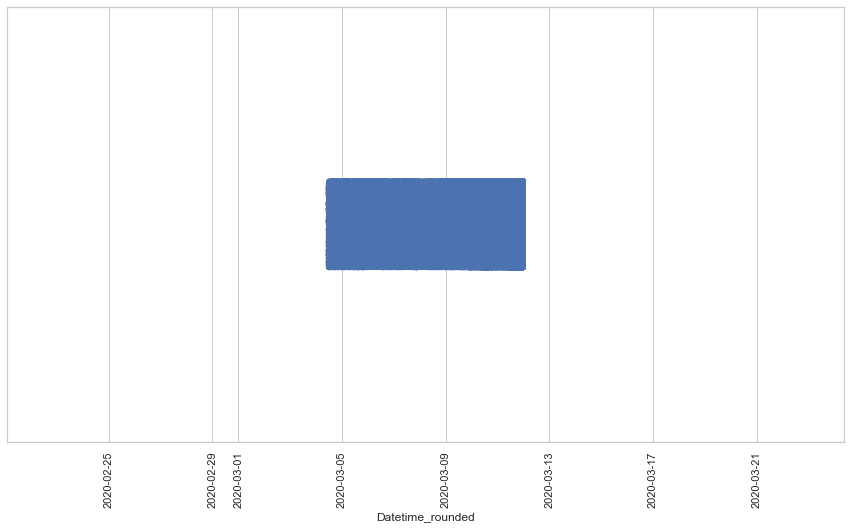

In [121]:
#importing Seaborn
import seaborn as sns
plt.figure(figsize=(15,8))
#plotting jitter plot
sns.set(style="whitegrid")
chart = sns.stripplot(x=df_tweet_1['Datetime_rounded'])
plt.xticks(rotation=90)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [137]:
data2= df_corona2.date_confirmation.dropna()


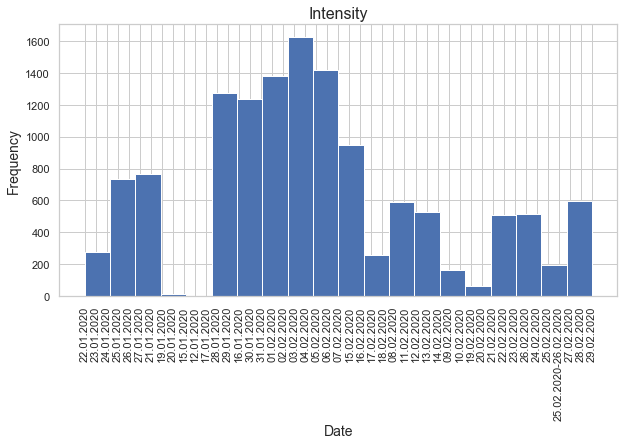

In [142]:
# Making histogram plot 1
plt.title("Intensity",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
data2.hist(bins=20, figsize=(10,5))
plt.xticks(rotation=90)
plt.show()